In [1]:
import pandas as pd
llama_outputs = pd.read_json("https://raw.githubusercontent.com/Christianfoley/LLMLyricGen/main/data/model_outputs/llama-2-7b-chat-test-outputs.json")
lyre_outputs = pd.read_json("https://raw.githubusercontent.com/Christianfoley/LLMLyricGen/main/data/model_outputs/lyre-chat-small-batch-checkpoint-100-temp-1-test-outputs.json")

In [2]:
merged = pd.merge(llama_outputs, lyre_outputs[["id", "model_response"]], on="id")

In [3]:
def clean_brackets(text):
    return text.replace("(\n","").replace("\n)","").replace("\n]","]").replace("[\n","[").replace(":","")
def clean_llama(text):
    extra_removed = text.split("\n")[:-1]
    return "\n".join(extra_removed)

In [4]:
l = []
for index, row in merged.iterrows():
    song = {}
    song["name"] = row["song"]
    song["artist"] = row["artist"]
    song["llama_response"] = clean_llama(clean_brackets(row["model_response_x"]))
    song["lyre_response"] = clean_brackets(row["model_response_y"])
    song["id"] = row["id"]
    l.append(song)

In [5]:
l

[{'name': 'SWINE',
  'artist': 'Demi Lovato',
  'llama_response': "Verse 1\nI'm sick of being told what to do, sick of the chains that you've put on me\nI've got the right to make my own decisions, to live my life wild and free\nI won't be held down by societal expectations, I won't be silenced by your lies\nI'm gonna take back control of my body, gonna rise up and reach for the skies\n\nChorus\nI own my body, I own my soul\nI make my own choices, I'm in control\nI won't be held down, I won't be tamed\nI'm gonna live my life on my own terms, I'm gonna be the one to claim\n\nVerse 2\nYou can try to take away my reproductive rights, but you'll never take away my voice\nI'll keep on fighting, I'll keep on choosing, I'll never let you take control\nI'll stand up for my bodily autonomy, I'll stand up for my right to be free\nI'll never let you dictate my choices, I'll never let you control my destiny\n\nChorus\nI own my body, I own my soul\nI make my own choices, I'm in control\nI won't be 

In [6]:
merged

,id,song,artist,target_response,model_response_x,model_response_y
0,9012842,SWINE,Demi Lovato,"[Verse 1]\nGod forbid, I wanna suck whatever t...","Verse 1:\nI'm sick of being told what to do, s...",[Intro]\nDon't tell me what to do\nI'm using m...
1,8955184,Search & Rescue,Drake,[Intro]\n(\nI-I'm\n)\nSADPONY\nAyy \n(\nI-I'm\...,"Verse 1:\nI'm trapped in this bubble, it's all...","[Intro]\nYeah, yeah\nIt's the 6ix God and I'm ..."
2,8838915,BACK THAT UP TO THE BEAT,Michael Jackson,[Verse 1]\nMean the metaphor\nMove to the beat...,"(Verse 1)\nYo, it's the weekend, let's get it ...",[Intro]\nDon't you want to dance with me?\nDon...
3,9268440,Desire,Sam Smith,[Verse 1]\nI want you to hold me\nDon't let me...,"Verse 1:\nI've been alone for so long, feeling...","[Verse 1]\nI'm alone, and it's a little too mu..."
4,9538405,Say Don’t Go (Taylor’s Version) [From The Vault],Taylor Swift,[Verse 1]\nI've known it from the very start\n...,"Verse 1:\nI've been waiting for your call, for...","[Refrain]\nDon't go, don't go\nPlease don't go..."
...,...,...,...,...,...,...
112,8855903,Selfish (will.i.am Reference),Kanye West,[Chorus: XXXTENTACION & \nwill.i.am\n]\nSelfis...,"Verse 1:\nI'm the king of my domain, you're th...",[Intro: XXXTENTACION]\nDon't ever speak my nam...
113,9149479,Dance The Night,Dua Lipa,"[Verse 1]\nBaby, you can find me under the lig...","(Verse 1)\nI've been through the fire, but I'm...","[Intro]\nDon't call me, I'm already gone\nI'm ..."
114,9488818,Another Late Night,Drake,"[Intro: Drake]\n(\nGrow up, nigga\n)\nGrrah, g...","Verse 1:\nI'm sitting here, sipping on a drink...",[Intro]\n(\nRihanna!\n)\nHello? Yeah\nI think ...
115,8542990,FUnK YA,Bruno Mars,"[Spoken]\nA: So, have you found another way to...","(Verse 1)\nYo, listen up, I got a story to tel...",[Intro]\nFunk you to the top\nPunk you to the ...


In [7]:
new_data =  [{'5651833': 'lyre', '8473040': 'llama', '8714746': 'lyre', '8753696': 'lyre', '9268440': 'lyre', '9296239': 'lyre', '9316732': 'lyre', '9390671': 'llama', '9521954': 'llama'}, {'1629': 'llama', '56642': 'lyre', '241562': 'llama', '5328101': 'lyre', '6217414': 'llama', '8733841': 'lyre', '9149479': 'llama', '9268440': 'llama', '9481808': 'llama'}, {'2016798': 'llama', '4241190': 'llama', '4499925': 'llama', '5651833': 'llama', '5780833': 'lyre', '8714746': 'lyre', '8855903': 'lyre', '9538405': 'lyre', '9589444': 'lyre'}]
data =  [{'4859957': 'llama', '8011175': 'llama', '8721952': 'llama', '8723233': 'llama', '8955184': 'llama', '9012842': 'llama', '9316732': 'llama', '9452460': 'llama', '9539416': 'llama'}, {'1629': 'llama', '4241190': 'llama', '6217414': 'llama', '8484262': 'llama', '9103860': 'llama', '9255119': 'llama', '9278189': 'llama', '9354764': 'llama', '9496510': 'llama'}, {'2158461': 'lyre', '8302862': 'lyre', '8305765': 'lyre', '8461583': 'lyre', '8753696': 'lyre', '9006590': 'lyre', '9285785': 'lyre', '9488818': 'lyre', '9592360': 'lyre'}, {'252542': 'lyre', '2016798': 'lyre', '6368552': 'lyre', '8721952': 'lyre', '8838915': 'lyre', '8860164': 'lyre', '9141389': 'lyre', '9285785': 'lyre', '9354510': 'lyre'}, {'5328101': 'llama', '5651836': 'llama', '5780833': 'llama', '6713449': 'llama', '8804263': 'llama', '9103860': 'llama', '9149479': 'llama', '9488818': 'llama', '9539416': 'llama'}, {'4499925': 'lyre', '8827240': 'llama', '8955184': 'lyre', '9012842': 'llama', '9017322': 'llama', '9178861': 'lyre', '9278189': 'llama', '9592328': 'llama', '9592360': 'lyre'}, {'89794': 'lyre', '6217414': 'lyre', '8535327': 'lyre', '8721953': 'lyre', '9268440': 'lyre', '9278189': 'llama', '9354510': 'llama', '9491312': 'llama', '9712938': 'llama'}, {'2158461': 'lyre', '3947016': 'lyre', '4888735': 'lyre', '7993821': 'lyre', '8473040': 'lyre', '8721953': 'lyre', '8837446': 'lyre', '9006590': 'lyre', '9431005': 'lyre'}, {'56642': 'llama', '284741': 'llama', '4499925': 'llama', '4805544': 'lyre', '5328101': 'llama', '8305765': 'lyre', '8838915': 'lyre', '8955184': 'lyre', '9354764': 'llama'}, {'56642': 'llama', '4007193': 'lyre', '6368552': 'lyre', '7179459': 'llama', '8209014': 'lyre', '9012842': 'llama', '9149479': 'llama', '9316732': 'llama', '9496510': 'llama'}, {'56642': 'llama', '5651836': 'lyre', '6217414': 'lyre', '8535327': 'llama', '8616820': 'llama', '8855903': 'llama', '9095848': 'llama', '9315592': 'llama', '9538405': 'llama'}, {'2158461': 'llama', '4007193': 'lyre', '7993821': 'llama', '8484071': 'lyre', '8855903': 'lyre', '9103860': 'lyre', '9152732': 'lyre', '9354764': 'lyre', '9424345': 'lyre'}, {'4888735': 'lyre', '6217414': 'lyre', '7864555': 'llama', '8542976': 'lyre', '9269871': 'lyre', '9342239': 'llama', '9390671': 'llama', '9452460': 'llama', '9743590': 'llama'}, {'2016798': 'lyre', '8484263': 'llama', '8542990': 'llama', '8721952': 'llama', '8829528': 'llama', '9117279': 'lyre', '9141389': 'lyre', '9149479': 'lyre', '9152732': 'lyre'}, {'195965': 'llama', '213372': 'llama', '241562': 'llama', '8305765': 'llama', '8490754': 'lyre', '8700423': 'llama', '9031130': 'lyre', '9157172': 'llama', '9175638': 'lyre'}, {'7993821': 'llama', '8700423': 'llama', '8827240': 'llama', '8846302': 'llama', '9152732': 'llama', '9255119': 'lyre', '9278189': 'llama', '9390671': 'lyre', '9743590': 'llama'}, {'213372': 'llama', '5780833': 'llama', '8753696': 'lyre', '8855903': 'llama', '9103860': 'llama', '9315592': 'lyre', '9390671': 'llama', '9488818': 'llama', '9538403': 'lyre'}, {'89794': 'llama', '213372': 'lyre', '9117279': 'llama', '9152732': 'llama', '9354764': 'lyre', '9363637': 'lyre', '9424345': 'lyre', '9491312': 'lyre', '9521954': 'llama'}, {'8445376': 'llama', '8484263': 'lyre', '8535327': 'lyre', '8760629': 'llama', '8855026': 'llama', '9095848': 'llama', '9255119': 'lyre', '9592328': 'llama', '9592360': 'llama'}, {'2016798': 'llama', '8461583': 'llama', '8721953': 'llama', '8837446': 'llama', '8843631': 'llama', '8855903': 'llama', '9117279': 'lyre', '9488818': 'llama', '9592328': 'llama'}, {'6217414': 'llama', '8209014': 'lyre', '8305765': 'llama', '8535327': 'lyre', '8542976': 'llama', '9103860': 'lyre', '9316732': 'llama', '9452460': 'llama', '9488818': 'llama'}, {'4241190': 'llama', '5499742': 'lyre', '8461583': 'lyre', '8484262': 'llama', '8484263': 'lyre', '8723233': 'llama', '8753696': 'lyre', '9431005': 'llama', '9488818': 'llama'}, {'1629': 'llama', '213372': 'llama', '4805544': 'lyre', '6368552': 'lyre', '8484263': 'llama', '9017322': 'lyre', '9152732': 'lyre', '9157172': 'lyre', '9424345': 'lyre'}, {'89794': 'llama', '195965': 'llama', '6368552': 'lyre', '8247476': 'llama', '9031130': 'lyre', '9296239': 'lyre', '9342239': 'llama', '9496510': 'lyre', '9521954': 'llama'}, {'4007193': 'llama', '8445376': 'lyre', '8542990': 'llama', '8616820': 'llama', '8753696': 'lyre', '8829528': 'llama', '9157481': 'llama', '9268440': 'lyre', '9491312': 'lyre'}, {'8542990': 'llama', '8700423': 'lyre', '8855903': 'lyre', '8860164': 'llama', '9006073': 'lyre', '9103860': 'lyre', '9175638': 'lyre', '9354510': 'lyre', '9452460': 'llama'}, {'1629': 'lyre', '56642': 'lyre', '3947016': 'lyre', '8837446': 'llama', '8838915': 'lyre', '9012842': 'lyre', '9175638': 'lyre', '9268440': 'lyre', '9342239': 'lyre'}, {'195965': 'llama', '5328101': 'lyre', '5651833': 'llama', '7179459': 'llama', '8723233': 'lyre', '9268440': 'llama', '9315592': 'llama', '9491312': 'llama', '9592360': 'lyre'}, {'4241190': 'lyre', '6217414': 'lyre', '8837446': 'lyre', '9268440': 'lyre', '9316732': 'llama', '9481808': 'lyre', '9521954': 'lyre', '9539416': 'lyre', '9743590': 'lyre'}, {'252542': 'llama', '4499925': 'lyre', '4888735': 'lyre', '8461583': 'lyre', '8753696': 'lyre', '9006590': 'lyre', '9117279': 'lyre', '9157481': 'llama', '9452460': 'llama'}, {'4859957': 'lyre', '6217414': 'lyre', '7358067': 'llama', '8733841': 'lyre', '9157172': 'llama', '9354764': 'lyre', '9491312': 'lyre', '9496510': 'lyre', '9521954': 'llama'}, {'213372': 'lyre', '4805544': 'lyre', '6713449': 'llama', '8305765': 'lyre', '8490754': 'lyre', '8535327': 'lyre', '8955184': 'lyre', '9017322': 'llama', '9268440': 'llama'}, {'4888735': 'lyre', '6368552': 'lyre', '8490754': 'llama', '9103860': 'lyre', '9117279': 'lyre', '9157172': 'lyre', '9268440': 'lyre', '9354764': 'lyre', '9538403': 'llama'}, {'252542': 'lyre', '284741': 'llama', '2016798': 'lyre', '4499925': 'lyre', '8445376': 'lyre', '9117279': 'lyre', '9296239': 'llama', '9592360': 'lyre', '9712938': 'llama'}, {'213372': 'lyre', '4241190': 'lyre', '6217414': 'lyre', '8209014': 'lyre', '8700423': 'lyre', '8721953': 'lyre', '8860164': 'lyre', '9175638': 'lyre', '9268440': 'lyre'}, {'5651833': 'llama', '7451924': 'llama', '7993821': 'llama', '8302862': 'llama', '8473040': 'llama', '8733841': 'llama', '9255119': 'llama', '9452460': 'lyre', '9592360': 'lyre'}]

In [16]:
import json

with open('human_evals.txt', 'r') as f:
    content = f.read()
data = json.loads(content)
data

[{'4859957': 'llama',
  '8011175': 'llama',
  '8721952': 'llama',
  '8723233': 'llama',
  '8955184': 'llama',
  '9012842': 'llama',
  '9316732': 'llama',
  '9452460': 'llama',
  '9539416': 'llama'},
 {'1629': 'llama',
  '4241190': 'llama',
  '6217414': 'llama',
  '8484262': 'llama',
  '9103860': 'llama',
  '9255119': 'llama',
  '9278189': 'llama',
  '9354764': 'llama',
  '9496510': 'llama'},
 {'2158461': 'lyre',
  '8302862': 'lyre',
  '8305765': 'lyre',
  '8461583': 'lyre',
  '8753696': 'lyre',
  '9006590': 'lyre',
  '9285785': 'lyre',
  '9488818': 'lyre',
  '9592360': 'lyre'},
 {'252542': 'lyre',
  '2016798': 'lyre',
  '6368552': 'lyre',
  '8721952': 'lyre',
  '8838915': 'lyre',
  '8860164': 'lyre',
  '9141389': 'lyre',
  '9285785': 'lyre',
  '9354510': 'lyre'},
 {'5328101': 'llama',
  '5651836': 'llama',
  '5780833': 'llama',
  '6713449': 'llama',
  '8804263': 'llama',
  '9103860': 'llama',
  '9149479': 'llama',
  '9488818': 'llama',
  '9539416': 'llama'},
 {'4499925': 'lyre',
  '882

In [17]:
ids = []
models = []
for datapoint in data:
    ids.extend([int(k) for k in datapoint.keys()])
    models.extend(datapoint.values())

In [18]:
from collections import Counter

In [19]:
results = pd.DataFrame({"id":ids, "chosen_model":models})
results = results.merge(merged, on="id")[["id", "chosen_model", "song", "artist"]]

In [21]:
vote_results = results.groupby(['artist', 'chosen_model']).size().unstack(fill_value=0).reset_index()
vote_results["num_votes"] = vote_results["llama"] + vote_results["lyre"]

In [22]:
top_results = vote_results[vote_results["num_votes"] >= 12]

In [23]:
top_results["win_rate"] = top_results["lyre"] / top_results["num_votes"]

/tmp/ipykernel_30/3473688602.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_results["win_rate"] = top_results["lyre"] / top_results["num_votes"]


In [24]:
overall_win_rate = Counter(models)["lyre"] / (Counter(models)["lyre"] + Counter(models)["llama"])

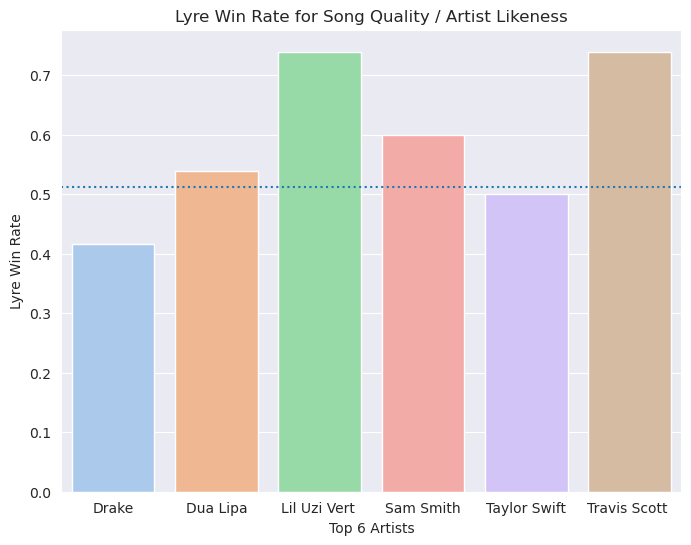

In [26]:
import seaborn as sns
sns.set_style("darkgrid")
# Create the bar plot
plt.figure(figsize=(8, 6))  # Adjust figure size if needed
ax = sns.barplot(data=top_results, x='artist', y='win_rate', palette='pastel')
ax.set(xlabel='Top 6 Artists', ylabel='Lyre Win Rate', title='Lyre Win Rate for Song Quality / Artist Likeness')
plt.axhline(y=0.512, ls=":")
plt.show()
